### Introduction
Tennis is a highly competitive sport, with many professionals starting at a young age. Furthermore, it is notorious for having an early retirement age compared to other sports. Many professional tennis players retire before 30, but popular players have retired at a much later age. With such an emphasis on age and success, our project aims to determine if age predicts success among the Top 500 tennis players. Using the "Player Stats for Top 500 Players" data set from https://www.ultimatetennisstatistics.com, the team selected only the age, current rank, current elo rank, and prize money (total accumulated earnings) variables from the .csv file.

We have chosen to assess a player's current rank as opposed to their best rank in order to reflect their current age in the ranking decision. Furthermore, rank refers to an accumulation of points scored by a player across various different tournaments, while elo rank is a comparative ranking that gauges a player's skill against their opponents. For example, a player who competes in lower-level tournaments may have a high rank but not necessarily a high elo rank. Looking at both ranking systems can help us determine the skill and ultimate success of a player.

### Methods
We first cleaned and wrangled the variables into a tidydata format. We then split the data into training and testing sets. We then visualized the variables of the training set by creating three individual scatter plots with age on the x-axis and the current rank, current elo rank, or prize money on the y-axis, respectively.

Afterwards, we will use Knn regression to see if age can predict the values of current rank, current elo rank, and prize money. We will achieve this by using the training data set to run a cross-validation to choose the best K parameter and train and fit the model. Then, we will use the testing data set to evaluate our model's performance. We will then visualize the results by creating six individual graphs (three histograms and three scatter plots) of the original data set, all with a trend line representing our model's regression predictions and age on the x-axis and the current rank, current elo rank, or prize money each on the y-axis. The histogram will have bins distributed by age group.

### Expected Outcomes and Significance
We expect to find that players in their early to mid-twenties will have a higher current rank and current elo rank, while players of an older age will have higher prize money. Tennis players could use this data to assess their earnings at any given age and better plan for their career's future.

Further research might include how other variables in the same data set (such as height and number of years gone professional) as well as other possible variables outside this data set (such as number of years spent training or costs spent on training) change the relationship between age and success.

In [ ]:
#Library Packages
library(tidyverse)
install.packages("janitor")
install.packages("kknn")
library(janitor)
library(repr)
library(tidymodels)
install.packages("tidyclust")
library(tidyclust)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘Rfast’




In [2]:
#Methods & Results A
#Reads the data of the Top 500 Tennis Players
player_data <- read_csv("https://raw.githubusercontent.com/lukeelliotchan/dsci100_grp35/main/player_stats.csv") |>
    clean_names()

#Seperates values in cells and makes the format tidy
player_data_tidy <- player_data |>
    separate(current_rank, c("current_rank", "points"), " ") |>
    separate(current_elo_rank, c("current_elo_rank", "current_elo"), " ") |>
    separate(age, c("age", "dob"), " ") |>
    separate(prize_money, c("dollar", "prize_money"), "\\$") |>
    separate(prize_money, c("prize_money", "temp"), "  ") |>
    select(current_rank, current_elo_rank, prize_money, age)

#Cleans erroneous text and irrelevant information
player_data_cleaned <- player_data_tidy |>
    mutate(current_rank = as.numeric(current_rank)) |> 
        #turn the columns into numbers
    mutate(prize_money = as.numeric(gsub(",", "", prize_money))) |> 
        #rows that dont meet condition of becoming number are just NA, will fix later
    mutate(current_elo_rank = gsub("\\(", "", current_elo_rank)) |>
    mutate(current_elo_rank = as.numeric(gsub("\\)","", current_elo_rank)))   |>                                      
    mutate(age = as.numeric(age)) |>
    na.omit()

head(player_data_cleaned)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 2 pieces. Additional pieces discarded in 2 rows [146, 441].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 412 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `prize_money = as.numeric(gsub(",", "", prize_money))`.
Caused by warning:
! NAs introduced by coercion”


current_rank,current_elo_rank,prize_money,age
<dbl>,<dbl>,<dbl>,<dbl>
178,144,3261567,32
183,100,6091971,27
31,33,1517157,22
417,189,122734,25
22,51,1893476,19
4,5,10507693,23


mean_age,median_age
<dbl>,<dbl>
27.72024,28


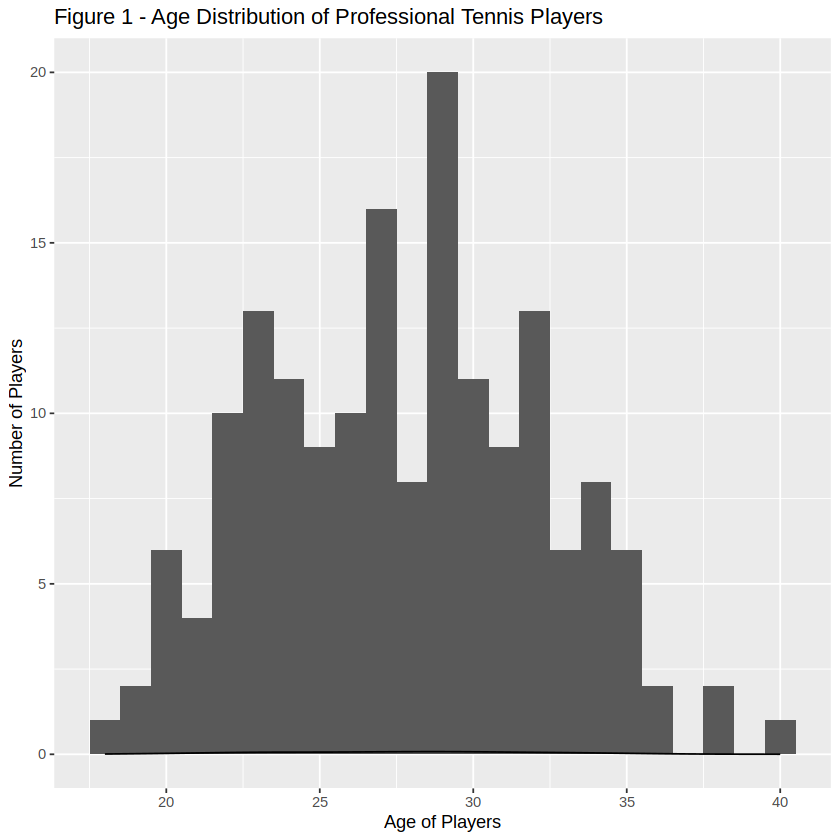

In [5]:
#Methods & Results B
#Plots the distribution of ages across all the players
age_distribution_plot <- player_data_cleaned |>
    ggplot(aes(x=age)) +
    geom_histogram(binwidth=1) +
    labs(x = "Age of Players", y = "Number of Players") +
    ggtitle("Figure 1 - Age Distribution of Professional Tennis Players")

age_distribution_plot

age_estimates <- player_data_cleaned |>
    summarize(mean_age = mean(age), median_age = median(age))
age_estimates

Saving 6.67 x 6.67 in image


NULL

Saving 6.67 x 6.67 in image


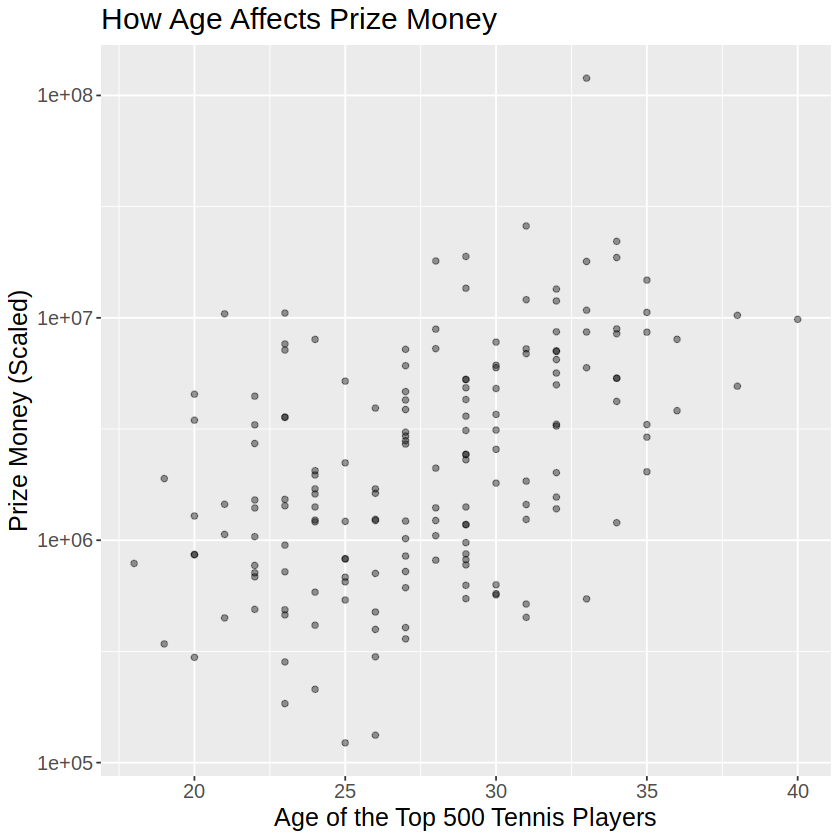

Saving 6.67 x 6.67 in image


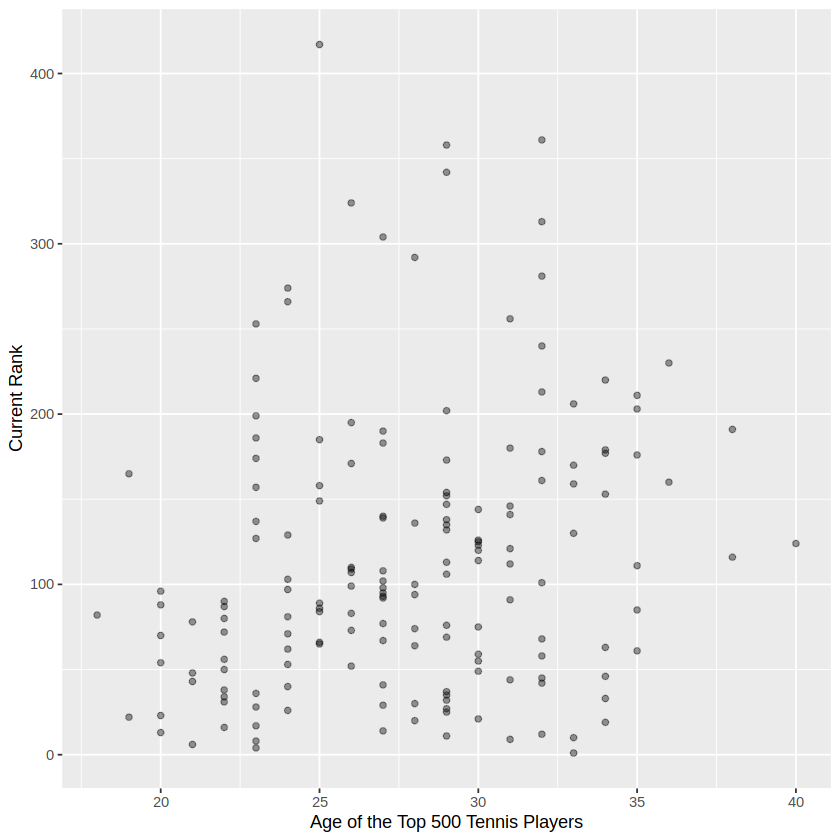

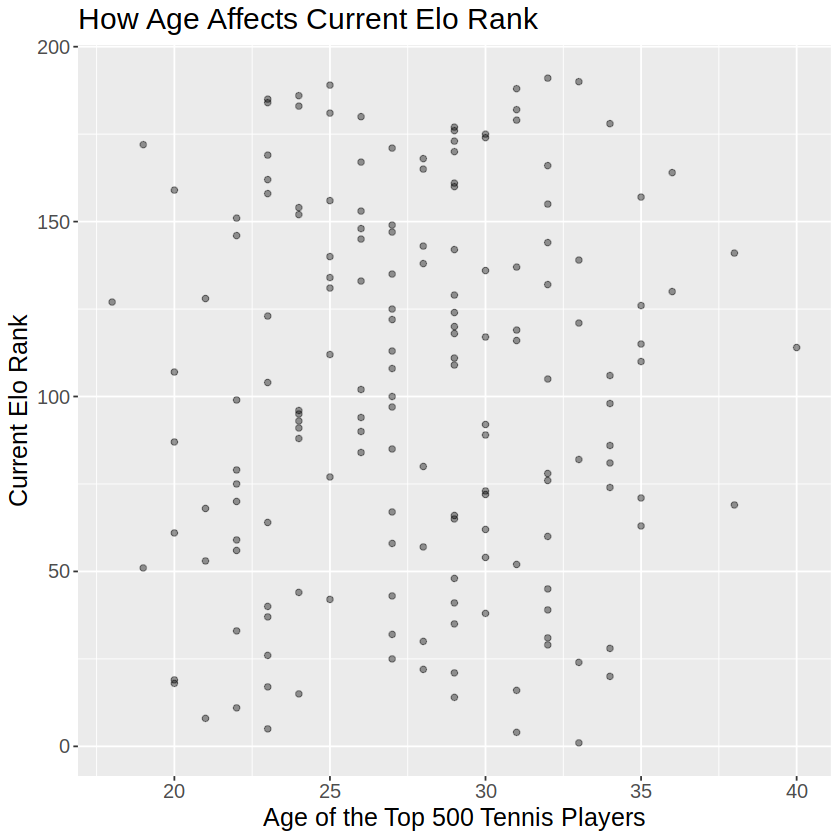

In [6]:
#Methods and Results C
#Three Initial Scatter Plots
age_money_plot <- player_data_cleaned |>
    ggplot(aes(x=age, y= prize_money))+
    geom_point(alpha=0.4)+
    labs(x="Age of the Top 500 Tennis Players", y= "Prize Money (Scaled)") +
    scale_y_log10() +
    ggtitle("How Age Affects Prize Money") +
    theme(text = element_text(size=15))
ggsave("age_money_plot.png",age_money_plot)
age_money_plot

age_rank_plot <- player_data_cleaned |>
    ggplot(aes(x=age, y= current_rank))+
    geom_point(alpha=0.4)+
    labs(x="Age of the Top 500 Tennis Players", y= "Current Rank") 
    ggtitle("How Age Affects Current Rank") +
    theme(text = element_text(size=15))
ggsave("age_rank_plot.png",age_rank_plot)
age_rank_plot

age_elo_plot <- player_data_cleaned |>
    ggplot(aes(x=age, y= current_elo_rank))+
    geom_point(alpha=0.4)+
    labs(x="Age of the Top 500 Tennis Players", y= "Current Elo Rank") +
    ggtitle("How Age Affects Current Elo Rank")+
    theme(text = element_text(size=15))
ggsave("age_elo_plot.png", age_elo_plot)
age_elo_plot

! Fold1: preprocessor 1/1, model 1/1: 96 samples were requested but there were 96 rows in the data. 91 will be...

! Fold2: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold3: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold4: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold5: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
86,rmse,standard,78.46196,5,7.578256,Preprocessor1_Model18


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,85.28231


.pred,age
<dbl>,<dbl>
103.2558,18
103.2558,19
103.2558,20
103.2558,21
103.2558,22
103.2558,23


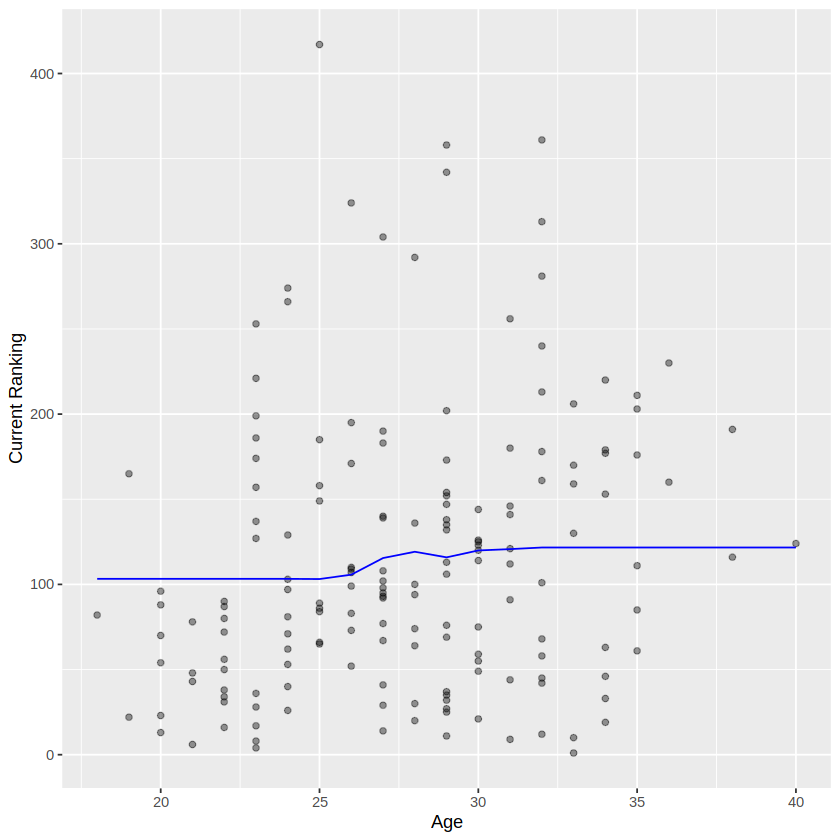

In [7]:
#Methods & Results D
#Splits the data into training and testing sets
set.seed(143) #ensures all randomized functions work the same
data_split <- initial_split(player_data_cleaned, prop = 0.75, strata = prize_money)
player_training <- training(data_split)
player_testing <- testing(data_split)

#KNN Regression on Current Rank
#Pre-process
current_rank_recipe <- recipe(current_rank ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

current_rank_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

current_rank_vfold <- vfold_cv(player_training, v = 5, strata = current_rank)

current_rank_wrkflw <- workflow() |>
    add_recipe(current_rank_recipe) |>
    add_model(current_rank_spec)

current_rank_gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Results of the Workflow + Finding best N
current_rank_results <- current_rank_wrkflw |>
    tune_grid(resamples = current_rank_vfold, grid = current_rank_gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

current_rank_nvalue <- current_rank_results |>
    slice_min(mean, n =1)

current_rank_nvalue #Best N Value, smallest mean

#Rerunning the KNN Regression with the best N
current_rank_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 86) |>
    set_engine("kknn") |>
    set_mode("regression")

current_ranking_fit <- workflow() |>
    add_recipe(current_rank_recipe) |>
    add_model(current_rank_spec1) |>
    fit(data = player_training)

current_ranking_fit_summary <- current_ranking_fit |>
    predict(player_testing) |>
    bind_cols(player_testing) |>
    metrics(truth = age, estimate = .pred) |>
    filter(.metric == "rmse")

current_ranking_fit_summary #according to textbook the error is the .estimate value


#predicts associated rank values with age, "by=1" so that it predicts for every age
currentrank_predgrid <- tibble(
    age = seq(from = player_data_cleaned |>
    select(age) |>
    min(),
    to = player_data_cleaned |>
    select(age) |>
    max(),
    by = 1))

#combines predicted values with original data frame
current_ranking_preds <- current_ranking_fit |>
    predict(currentrank_predgrid) |>
    bind_cols(currentrank_predgrid)
head(current_ranking_preds)

#Graph of the KNN regression
current_ranking_final <- player_data_cleaned |>
    ggplot(aes(x = age, y = current_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(data = current_ranking_preds,
              mapping = aes(x = age, y = .pred),
              colour = "blue") +
    labs(x = "Age", y = "Current Ranking") 
current_ranking_final

! Fold1: preprocessor 1/1, model 1/1: 96 samples were requested but there were 96 rows in the data. 91 will be...

! Fold2: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold3: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold4: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold5: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
96,rmse,standard,52.70223,5,1.243212,Preprocessor1_Model20


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,75.93768


.pred,age
<dbl>,<dbl>
102.4375,18
102.4375,19
102.4375,20
102.4375,21
102.4375,22
102.4375,23


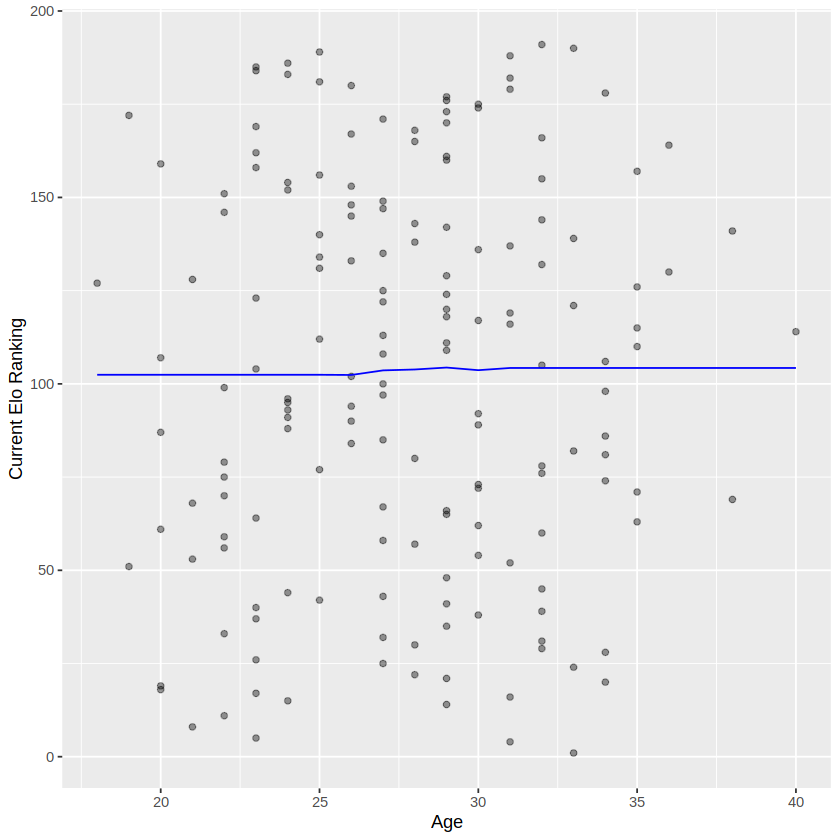

In [8]:
set.seed(143)

#KNN Regression on Current Elo Ranking
#Pre-process
current_elo_r_recipe <- recipe(current_elo_rank ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

current_elo_r_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

current_elo_r_vfold <- vfold_cv(player_training, v = 5, strata = current_elo_rank)

current_elo_r_wrkflw <- workflow() |>
    add_recipe(current_elo_r_recipe) |>
    add_model(current_elo_r_spec)

current_elo_r_gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Results of the Workflow + Finding best N
current_elo_r_results <- current_elo_r_wrkflw |>
    tune_grid(resamples = current_elo_r_vfold, grid = current_elo_r_gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

current_elo_r_nvalue <- current_elo_r_results |>
    slice_min(mean, n =1)

current_elo_r_nvalue #Best N Value, smallest mean

#Rerunning the KNN Regression with the best N
current_elo_r_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 96) |>
    set_engine("kknn") |>
    set_mode("regression")

current_elo_r_fit <- workflow() |>
    add_recipe(current_elo_r_recipe) |>
    add_model(current_elo_r_spec1) |>
    fit(data = player_training)

current_elo_r_fit_summary <- current_elo_r_fit |>
    predict(player_testing) |>
    bind_cols(player_testing) |>
    metrics(truth = age, estimate = .pred) |>
    filter(.metric == "rmse")

current_elo_r_fit_summary #according to textbook the error is the .estimate value


#predicts associated rank values with age, "by=1" so that it predicts for every age
current_elo_r_predgrid <- tibble(
    age = seq(from = player_data_cleaned |>
    select(age) |>
    min(),
    to = player_data_cleaned |>
    select(age) |>
    max(),
    by = 1))

#combines predicted values with original data frame
current_elo_r_preds <- current_elo_r_fit |>
    predict(current_elo_r_predgrid) |>
    bind_cols(current_elo_r_predgrid)
head(current_elo_r_preds)

#Graph of the KNN regression
current_elo_r_final <- player_data_cleaned |>
    ggplot(aes(x = age, y = current_elo_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(data = current_elo_r_preds,
              mapping = aes(x = age, y = .pred),
              colour = "blue") +
    labs(x = "Age", y = "Current Elo Ranking") 
current_elo_r_final

! Fold1: preprocessor 1/1, model 1/1: 96 samples were requested but there were 96 rows in the data. 91 will be...

! Fold2: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold3: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold4: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold5: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
51,rmse,standard,7581355,5,3588309,Preprocessor1_Model11


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4743548


.pred,age
<dbl>,<dbl>
1609070,18
1609070,19
1609070,20
1609070,21
1609070,22
1661183,23


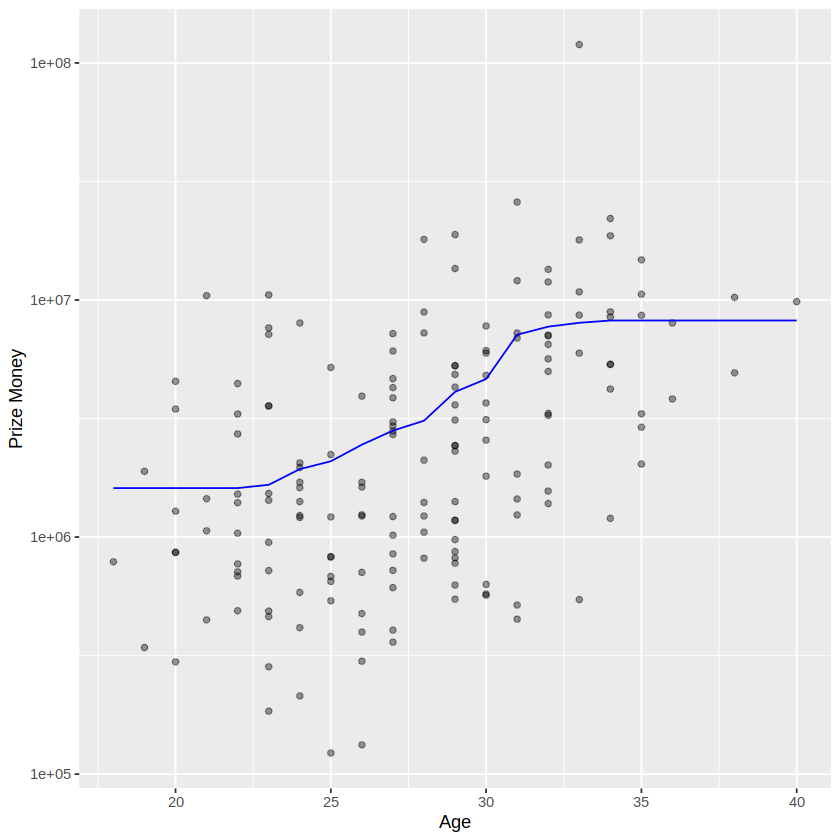

In [9]:
set.seed(143)

#KNN Regression on Prize Money
#Pre-process
prize_money_recipe <- recipe(prize_money ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

prize_money_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

prize_money_vfold <- vfold_cv(player_training, v = 5, strata = prize_money)

prize_money_wrkflw <- workflow() |>
    add_recipe(prize_money_recipe) |>
    add_model(prize_money_spec)

prize_money_gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Results of the Workflow + Finding best N
prize_money_results <- prize_money_wrkflw |>
    tune_grid(resamples = prize_money_vfold, grid = prize_money_gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

prize_money_nvalue <- prize_money_results |>
    slice_min(mean, n =1)

prize_money_nvalue #Best N Value, smallest mean

#Rerunning the KNN Regression with the best N
prize_money_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 51) |>
    set_engine("kknn") |>
    set_mode("regression")

prize_money_fit <- workflow() |>
    add_recipe(prize_money_recipe) |>
    add_model(prize_money_spec1) |>
    fit(data = player_training)

prize_money_fit_summary <- prize_money_fit |>
    predict(player_testing) |>
    bind_cols(player_testing) |>
    metrics(truth = age, estimate = .pred) |>
    filter(.metric == "rmse")

prize_money_fit_summary #according to textbook the error is the .estimate value


#predicts associated money values with age, "by=1" so that it predicts for every age
prize_money_predgrid <- tibble(
    age = seq(from = player_data_cleaned |>
    select(age) |>
    min(),
    to = player_data_cleaned |>
    select(age) |>
    max(),
    by = 1))

#combines predicted values with original data frame
prize_money_preds <-prize_money_fit |>
    predict(prize_money_predgrid) |>
    bind_cols(prize_money_predgrid)
head(prize_money_preds)

#Graph of the KNN regression
prize_money_final <- player_data_cleaned |>
    ggplot(aes(x = age, y = prize_money)) +
    geom_point(alpha = 0.4) +
    geom_line(data = prize_money_preds,
              mapping = aes(x = age, y = .pred),
              colour = "blue") +
    labs(x = "Age", y = "Prize Money") +
    scale_y_log10()
prize_money_final

In [ ]:
set.seed(143)

#Reusable Code:
kmeans_spec <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 10)

players_clust_ks <- tibble(num_clusters = 1:9)

#Clustering, not sure if player_training is used here
kmeans_current_rank_recipe <- recipe(current_rank ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

kmeans_current_rank_results <- workflow() |>
    add_recipe(kmeans_current_rank_recipe) |>
    add_model(kmeans_spec) |>
    tune_cluster(resamples = apparent(player_training), grid = players_clust_ks) |>
    collect_metrics()

#Find the best number of clusters
kmeans_current_rank_results <- kmeans_current_rank_results |> 
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)

current_rank_elbow_plot <- ggplot(kmeans_results, aes(x = num_clusters, y = total_WSSD)) +
  geom_point() +
  geom_line(colour = green) +
  labs(x = "K", y = "Total within-cluster sum of squares") +
  scale_x_continuous(breaks = 1:9) + 
  theme(text = element_text(size = 12))

current_rank_elbow_plot

#Apply clusters to the data
kmeans_current_rank_spec <- k_means(num_clusters = 4) |>
    set_engine("stats", nstart = 10)

kmeans_current_rank_fit <- workflow() |>
    add_recipe(kmeans_current_rank_recipe) |>
    add_model(kmeans_current_rank_spec) |>
    fit(data = player_data_cleaned)

current_rank_augmented <- kmeans_current_rank_fit |>
    augment(player_data_cleaned)

current_rank_cluster_plot <- ggplot(current_rank_augmented, aes(x = age, y = current_rank, color = .pred_cluster)) +





also installing the dependency ‘Rfast’


